### Importing Dependencies 

In [271]:
from Bio import Align #smith waterman algorithm
from Bio import SeqIO #Fetching data from file
import numpy as np #Matrix operations
import matplotlib.pyplot as plt #Plotting
import umap    #UMAP
from sklearn.preprocessing import StandardScaler #Pre processing data

### Excercise 1: Data set 

#### Fetching Data and labels from the .fasta file 

In [10]:
Sequences =[]
description =[]
with open("data.fasta") as handle:
    count =0
    for record in SeqIO.parse(handle, "fasta"):
        description.append(record.description)
        Sequences.append(record.seq)
        count+=1    

#Extracting Lables in '[]' from the Description 
labels =[]
for i in description:
    get = False
    label =''
    for c in i:
        if (c == ']'):get = False    
        if get: label+=c
        if (c == '['):get = True    
    labels.append(int(label))        

#### Calculating Local alignment score using Smith waterman alignment 

In [11]:
def alignment_score(s1,s2,match_score = 1,mismatch_score = -1, gap_penalty = -2):
    aligner = Align.PairwiseAligner()
    aligner.mode = 'local'
    aligner.match_score = match_score
    aligner.mismatch_score = mismatch_score
    aligner.open_gap_score = gap_penalty
    alignments = aligner.align(s1,s2)
    return alignments.score

In [12]:
#rewards and penalties
match_score = 1
mismatch_score = -1
gap_penalty = -2

#calculating alignment scores between Sequence 2 and 3
seq1 = 1
seq2 = 2
Score = alignment_score(Sequences[seq1-1],Sequences[seq2-1],match_score ,mismatch_score, gap_penalty)
print("The alignment score between sequence", seq1, "and", seq2,"is: ", Score)

The alignment score between sequence 1 and 2 is:  5.0


### Excercise 2: Embedding 

#### Constructing Pairwise similarity matrix

In [272]:
similarity_matrix = np.zeros((len(Sequences),len(Sequences)))
for i in range(similarity_matrix.shape[0]):
    for j in range(i,similarity_matrix.shape[1]):
        pass#similarity_matrix[i][j] = alignment_score(Sequences[i],Sequences[j])
similarity_matrix = np.load('Similarity_Matrix.npy') 

# Normalizing Similarity Matrix
row_sums = similarity_matrix.sum(axis=1)
similarity_matrix /=  row_sums[:, np.newaxis]

#### Euclidean Embedding (100 Dimension) 

In [218]:
#Calculating Eigen values and Eigen vectors of similarity_matrix
eigval,eigvec = np.linalg.eig(similarity_matrix)
eigval = abs(eigval)
eigvec = abs(eigvec)
#Considering largest 100 eigen values for embedding 
#Sorting eigen values and eigen vectors
index =[x for x in range(5000)]
eigvalsort,index_sort = (list(t) for t in zip(*sorted(zip(eigval,index),reverse= True)))
eigvecsort = []
for i in index_sort:
    eigvecsort.append(eigvec[:,i])
eigvecsort = np.array(eigvecsort).T 

#Considering largest 100 eigen values for embedding 
U  =  eigvecsort[:,:100]

Lambda = abs(np.array(eigvalsort[:100]))**(-0.5)
dell = Lambda*np.eye(len(Lambda))
V = U@dell
X = np.dot(similarity_matrix,V)

### Excercise 3: Plotting

#### UMAP Implementation 

#### UMAP
Uniform Manifold Approximation and Projection (UMAP) is a dimensionality reduction technique for non-Linear data.

##### Parameters for UMAP
* n_neighbour: The number of approximate nearest neighbours which is used to construct the initial high-dimensional graph.Since the total Sequences (5000) has 15 classes, the expected neighbours for each cluster is 333 (5000/15).


* min_dist: The minimum distance between points in low-dimensional space,this parameter controls how tightly UMAP clumps points together. The min_dist of 1 is used to see some distinct clusters.


* n_components: The dimension of the final output. Since 100 dimension data is reduced to 2 for plotting 2d graph, n_components is 2

In [268]:
reducer = umap.UMAP(n_neighbors =333, min_dist =1,n_components=2)
embedding = reducer.fit_transform(X)

In [269]:
#separating data point with respect to its labels
D_labels = np.array(list(dict.fromkeys(labels)))
t = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],]
for i in range(len(labels)):
    index= np.where(D_labels == labels[i])[0][0]
    if (index == 0):t[0].append(embedding[i])
    elif (index == 1):t[1].append(embedding[i])
    elif (index == 2):t[2].append(embedding[i])
    elif (index == 3):t[3].append(embedding[i])
    elif (index == 4):t[4].append(embedding[i])
    elif (index == 5):t[5].append(embedding[i])
    elif (index == 6):t[6].append(embedding[i])
    elif (index == 7):t[7].append(embedding[i])
    elif (index == 8):t[8].append(embedding[i])
    elif (index == 9):t[9].append(embedding[i])
    elif (index == 10):t[10].append(embedding[i])
    elif (index == 11):t[11].append(embedding[i])
    elif (index == 12):t[12].append(embedding[i])
    elif (index == 13):t[13].append(embedding[i])
    else:t[14].append(embedding[i])
        
def plot(t):
    plt.scatter(np.array(t[0]).T[0],np.array(t[0]).T[1])
    plt.scatter(np.array(t[1]).T[0],np.array(t[1]).T[1])
    plt.scatter(np.array(t[2]).T[0],np.array(t[2]).T[1])
    plt.scatter(np.array(t[3]).T[0],np.array(t[3]).T[1])
    plt.scatter(np.array(t[4]).T[0],np.array(t[4]).T[1])
    plt.scatter(np.array(t[5]).T[0],np.array(t[5]).T[1])
    plt.scatter(np.array(t[6]).T[0],np.array(t[6]).T[1])
    plt.scatter(np.array(t[7]).T[0],np.array(t[7]).T[1])
    plt.scatter(np.array(t[8]).T[0],np.array(t[8]).T[1])
    plt.scatter(np.array(t[9]).T[0],np.array(t[9]).T[1])
    plt.scatter(np.array(t[10]).T[0],np.array(t[10]).T[1])
    plt.scatter(np.array(t[11]).T[0],np.array(t[11]).T[1])
    plt.scatter(np.array(t[12]).T[0],np.array(t[12]).T[1])
    plt.scatter(np.array(t[13]).T[0],np.array(t[13]).T[1])
    plt.scatter(np.array(t[14]).T[0],np.array(t[14]).T[1])
    plt.title('Umap Representation of Protein Sequences')
    plt.show()        

#### Plotting

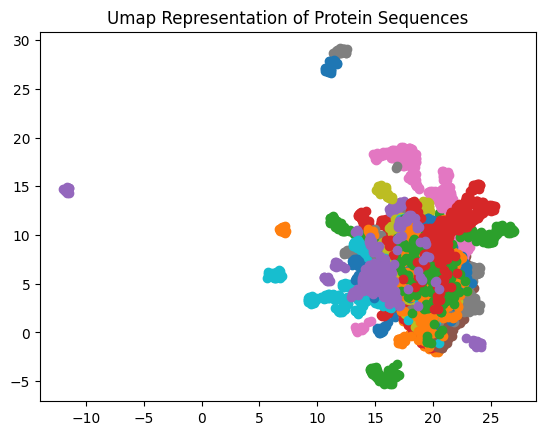

In [270]:
plot(t)